Reginald Rhoe

Nehemiah Clark

Machine Learning Fundamentals

Project #1

This analysis report investigates the survival opportunities of Titanic passengers. It hypothesizes that either natural selection or human selection influenced the survival of a specific segment of the population aboard, favoring women and children over other demographics. This preferential survival may also be reflected in the analysis of clustered survivor groups.

Further investigation will focus on comparing the survival prediction of women and children to the survival rate of unaccompanied males.

Data Quality: A key challenge in this analysis is the presence of missing age data for 170 out of 891 passengers (approximately 15% of the population), primarily among those who perished. Additionally, family relationships need to be inferred based on shared last names and estimated ages, potentially aided by cabin number information. This limitation will be addressed through feature engineering, as discussed in the data cleaning and feature engineering sections, by combining two related features.


<style>
  .toc-entry {
    font-size: 16px;
    margin-bottom: 5px;
  }
  .toc-entry a {
    text-decoration: none; /* Remove underlines from links */
    color: #337ab7; /* Set link color (default bootstrap blue) */
  }
  .toc-entry a:hover {
    text-decoration: underline; /* Add underline on hover */
    color: #23527c; /* Darken link color on hover */
  }
</style>

<h1>Table of Contents</h1>
<ul>
  <li class="toc-entry"><a href="#python-libraries">1. Python Libraries</a></li>
  <li class="toc-entry"><a href="#data-content">2. Data Content</a></li>
  <li class="toc-entry"><a href="#data-analysis">3. Data Analysis</a></li>
  <li class="toc-entry"><a href="#hypothesis">4. Hypothesis</a></li>
  <li class="toc-entry"><a href="#data-visualization">5. Data Visualization</a></li>
  <li class="toc-entry"><a href="#logistic-regression-analysis">6. Logistic Regression Analysis</a></li>
  <li class="toc-entry"><a href="#random-forest-analysis">7. Random Forest Analysis</a></li>
  <li class="toc-entry"><a href="#comparison">8. Comparison</a></li>
  <li class="toc-entry"><a href="#comparison">9.Training Models Comparsions</a></li>
  <li class="toc-entry"><a href="#conclusion">10. Conclusion</a></li>
  <li class="toc-entry"><a href="#additional-effort">11. Additional Effort</a></li>
</ul>


# 1. Python Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

# file_path = "/content/drive/My Drive/Classroom/MB-CSE604_MachineLearningFundamentalsMay2025/RR_CSE604MachineLearningProject1/Titanic-Dataset.csv"
# data = pd.read_csv(file_path)


In [ ]:
#Direct download link
url = "https://drive.google.com/uc?export=download&id=1QCoQ-BcUauCzR31go4WuDo0VPKr-EmV4"

#Download content
response = requests.get(url)
response_data = StringIO(response.text)

#Load into DataFrame
data = pd.read_csv(response_data)

<style>
  .toc-entry {
    font-size: 16px;
    margin-bottom: 5px;
  }
  .toc-entry a {
    text-decoration: none; /* Remove underlines from links */
    color: #337ab7; /* Set link color (default bootstrap blue) */
  }
  .toc-entry a:hover {
    text-decoration: underline; /* Add underline on hover */
    color: #23527c; /* Darken link color on hover */
  }
</style>
# 2. **Data Content**

###1 PassengerID index
###2.Survived - guest result
###3.Pclass - passenger ticket purchase class
###5.Sex- gender
###6.Age-
###7.SibSp - siblings
###8.Parch - Parent = Children
###9.Ticket -
###10. Fare-
###11.Cabin-
###12. Embarked- place where boarded
###Data Quality: A notable issue is the absence of age data for 170 of 891 passengers (approximately 15%), predominantly among those who perished. Furthermore, family group size will be inferred by combining the 'Parch' and 'SibSp' features.







<style>
  .toc-entry {
    font-size: 16px;
    margin-bottom: 5px;
  }
  .toc-entry a {
    text-decoration: none; /* Remove underlines from links */
    color: #337ab7; /* Set link color (default bootstrap blue) */
  }
  .toc-entry a:hover {
    text-decoration: underline; /* Add underline on hover */
    color: #23527c; /* Darken link color on hover */
  }
</style>**<h1>3.Data Analysis</h1>**
###The initial rows reveal the presence of categorical and ordinal data in the 'Name', 'Sex', 'Ticket', and 'Cabin' fields. The 'Age' field also contains null values."


In [ ]:
data.head()  # head method show only

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


###Shows there were a total of 891 Passengers, max age was 80, some large family groups as large as 8

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Hypothesis:
Based on the preliminary data exploration and initial analysis, it is hypothesized that passenger survival on the Titanic was significantly influenced by demographic factors, specifically sex and age, aligning with a potential "women and children first" protocol. Additionally, the analysis suggests that socioeconomic status, as represented by passenger class, also played a role in survival rates. This preferential survival of certain groups is expected to be observable in the distribution of survivors across these features and may be reflected in the predictive capabilities of the logistic regression and random forest models.


**5. Data Visualization
   ,<br>   Analysis charts needed: </br>**
* Correlation map of survivors to gender, age, fare, ticketclass, family or  unaccompanied  


* drop  Name field, Ticket,Parch columns add column for family



* Distribution of breakout gender of all passengers  vs gender survivors
 Distribution of age all passengers  vs  age of just survivors

* Prediction of survival if female or children comparision vs survival result if male, unaccompanied       




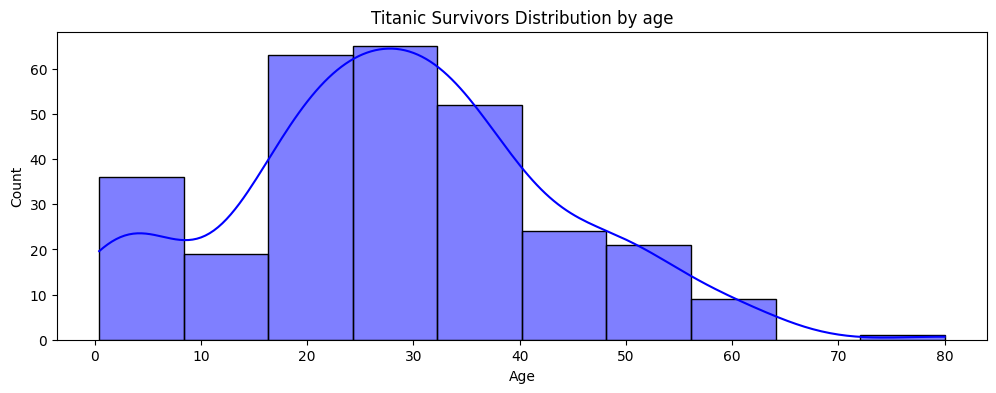

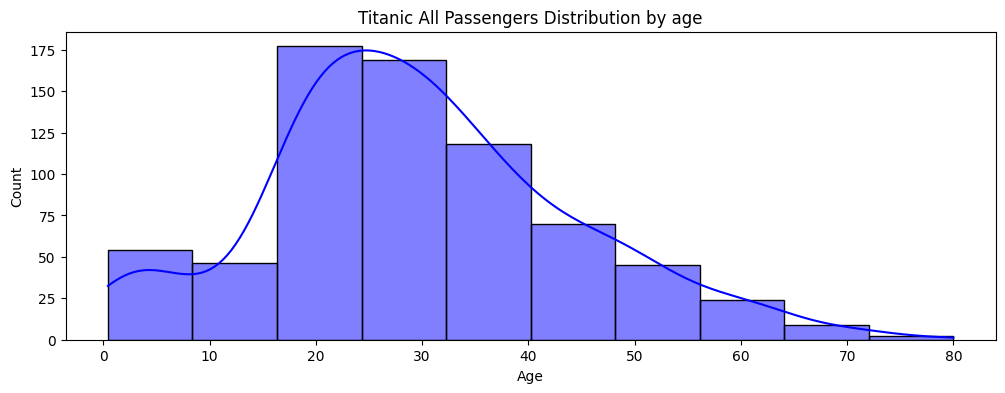

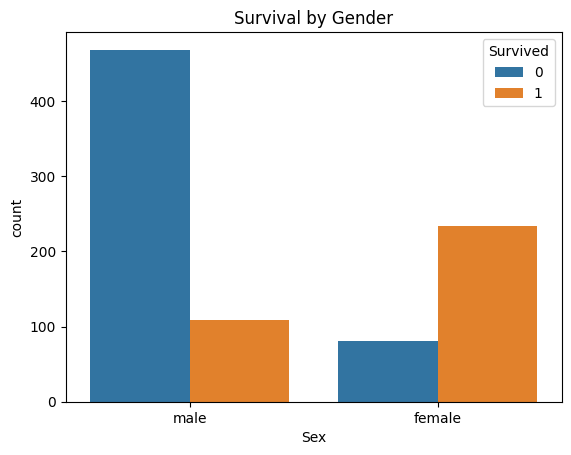

In [ ]:
Survivors =data[data['Survived']==1]
plt.figure(figsize=(12,4))
sns.histplot(Survivors['Age'],bins=10,color='blue',kde=True)
plt.title('Titanic Survivors Distribution by age')
plt.show()
plt.figure(figsize=(12,4))
sns.histplot(data['Age'],bins=10,color='blue',kde=True)
plt.title('Titanic All Passengers Distribution by age')
plt.show()


sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

The correlation heatmap indicates relatively weak correlations among the parameters. 'Pclass' exhibits the highest correlation with survival at 0.55, followed by 'Sex' at 0.54. While these correlations are not exceptionally strong, both features appear important. Notably, 'Sex' and 'Pclass' are not correlated with each other. A strong correlation is typically considered to be greater than 0.87. Based on initial observations, 'Age', 'Sex', and 'Pclass' seem to be the most significant features.



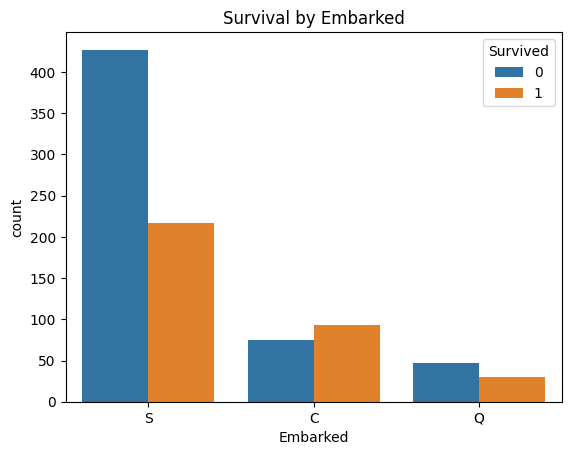

In [ ]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title('Survival by Embarked')
plt.show()

A higher percentage of First Class and Second Class passengers survived than Third class

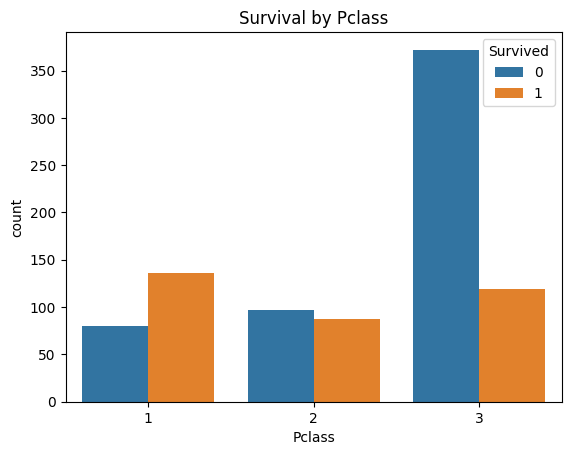

In [ ]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')
plt.show()

# The following converts categorical data Gender and Embarked to integers so that a full correlation heatmap can be constructed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


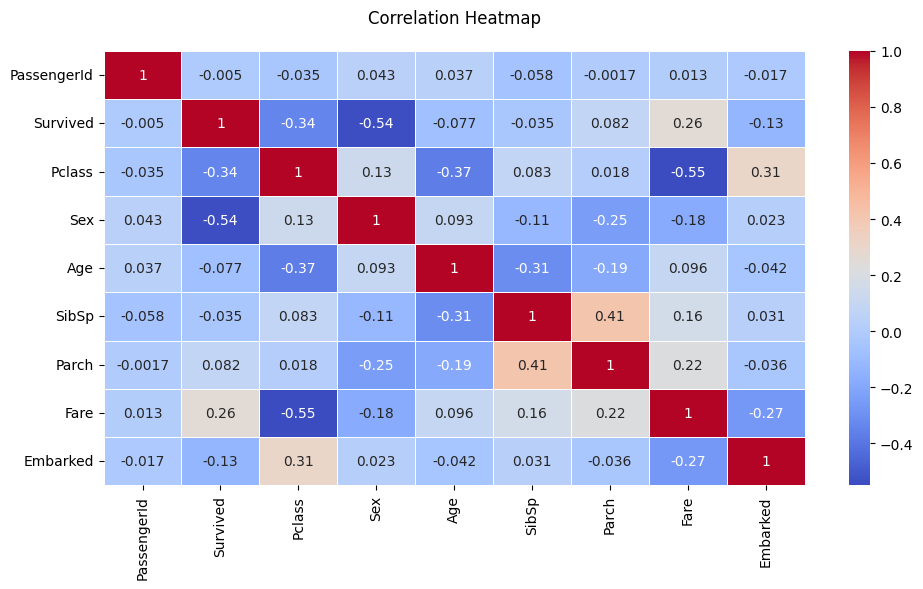

In [ ]:


# Create a dictionary to map 'male' and 'female' to 1 and 0 respectively
gender_mapping = {'male': 1, 'female': 0}

# Use the map function to apply the mapping to the 'Sex' column
data['Sex'] = data['Sex'].map(gender_mapping)
# apply the mapping to the 'Embarked' column
embark_mapping = {'S':2, 'C':1, 'Q':3}
data['Embarked'] = data['Embarked'].map(embark_mapping)
data.info()
# Verify the changes
data.head()
#correlation map
plt.figure(figsize=(10, 6))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', pad=20)
plt.tight_layout()

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


#Data Cleaning for feature selection


####Drop the 'Fare' and 'Embarked' columns due to their redundancy with 'Pclass'. 'Pclass' represents the ticket class (first, second, or third), which is closely related to both the embarkation port and the fare.
####By dropping 'Fare' and 'Embarked', 'Pclass' serves as the primary feature representing this cluster of related information. This approach simplifies the model while retaining key information about the passenger's socioeconomic status and its potential impact on survival.
####Drop the 'Cabin' column as it is categorical and considered irrelevant for this analysis.
####Drop the 'Parch' column as it is redundant with the 'SibSp' feature when considering family/group size.
####Justification : The field Parch -parents and children is related to the field SibSp sibling and spouses because the children are most likely the same family. Hence we introduce a new field family size and compare whether this makes a difference in the analysis with or without it.
####Drop the 'Name' and 'Ticket' columns as they are deemed irrelevant. Missing values in the 'Age' column will be replaced with the average age of the population.
####Possibly Consider removing a portion of the population that died and check accuracy of model.

In [ ]:
drop_list1 =['PassengerId','Fare','Embarked','Cabin','Parch','Name','Ticket']
data_short = data.drop(drop_list1,axis = 1 )
data_short.head(10)


,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0
5,0,3,1,NaN,0
6,0,1,1,54.0,0
7,0,3,1,2.0,3
8,1,3,0,27.0,0
9,1,2,0,14.0,1


In [ ]:
#age column replace NaN with average age of population
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')


# Calculate the average age
average_age = data['Age'].mean()

# Replace NaN values with the average age
data_short['Age'].fillna(average_age, inplace=True)
# Convert the 'Age' column to int64
data_short['Age'] = data_short['Age'].astype('int64')

data_short.head(10)

,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,22,1
1,1,1,0,38,1
2,1,3,0,26,0
3,1,1,0,35,1
4,0,3,1,35,0
5,0,3,1,29,0
6,0,1,1,54,0
7,0,3,1,2,3
8,1,3,0,27,0
9,1,2,0,14,1


In [ ]:
data_short=data_short.drop(columns=['Survived'])
data_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Sex     891 non-null    int64
 2   Age     891 non-null    int64
 3   SibSp   891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


In [ ]:
# Scale numeric
data_short.iloc[:,1:]=StandardScaler().fit_transform(data_short.iloc[:,1:])



In [ ]:
# Features (X)
X = data_short

# Target (y)
y = data['Survived']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# With Hyperparameter Tuning accuracy improved 2%<br>
# Without  Hyperparameter Tuning Accuracy is:  0.7653631284916201

In [ ]:
# Create and train the model
from sklearn.linear_model import LogisticRegression


LR_model=LogisticRegression()
   # Set best parameters Hyperparameter Tuning
LR_model.C = 0.1
LR_model.penalty = 'l2'



LR_model.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)
y_train.head()


,Survived
594,0
700,1
734,0
260,0
368,1


In [ ]:
y_test.head()

,Survived
214,0
450,0
843,0
528,0
401,0


# **6.Logistic Regression Model Evaluation**

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
y_predict = LR_model.predict(X_test)
acc = accuracy_score(y_test, y_predict)
print("Accuracy is: ", acc)

Accuracy is:  0.7932960893854749


In [ ]:
# Confusion matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_test, y_predict)

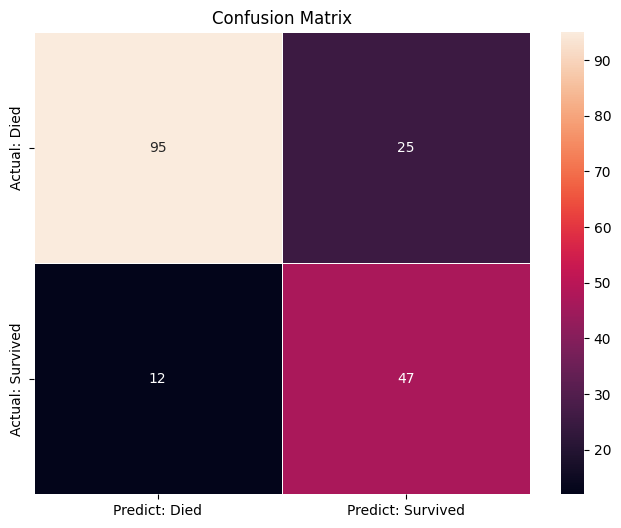

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, linewidths=.5,
            yticklabels=['Actual: Died', 'Actual: Survived'],
            xticklabels=['Predict: Died', 'Predict: Survived'])

# Add title and labels
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Classification Report
report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       120
           1       0.65      0.80      0.72        59

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.81      0.79      0.80       179



Best parameters: {'C': 0.1, 'penalty': 'l2'}
Cross-validation scores: [0.7988826815642458, 0.7808988764044944, 0.7921348314606742, 0.7696629213483146, 0.8089887640449438]
Average accuracy: 0.7901136149645346
Pclass: -0.9119949494598429
Sex: -1.151110684203094
Age: -0.34149072129773506
SibSp: -0.2776800974710032


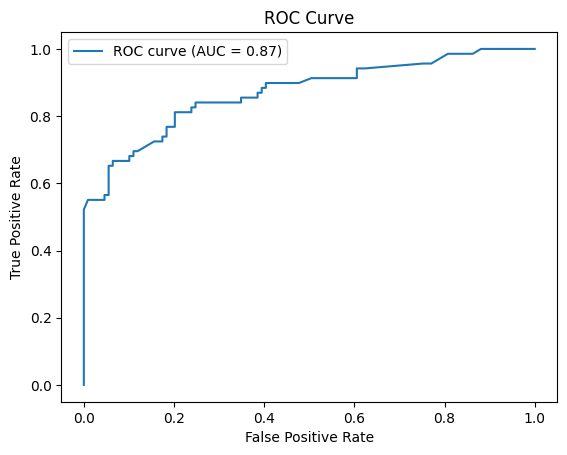

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

# Cross-validation using StratifiedKFold
cv = StratifiedKFold(n_splits=5)
scores = []
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(**grid.best_params_)  # Use best parameters from GridSearchCV
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))

# Feature importance
importance = model.coef_[0]
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

# ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of survival
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<head>
<title>Logistic Regression Coefficient Interpretation</title>
</head>
<body>

<h1>Logistic Regression Coefficient Interpretation</h1>

<h2>Coefficients</h2>
<ul>
  <li>Pclass: -.912</li>
  <li>Sex: -1.15</li>
  <li>Age: -0.34</li>
   <li>SibSp: -0.277</li>
</ul>


<h2>Interpretation</h2>
<ul>
  <li><b>Pclass:</b> The negative coefficient (-.912) for 'Pclass' indicates that higher passenger classes (e.g., 1st class) are associated with a higher likelihood of survival.</li>
  <li><b>Sex:</b> The negative coefficient (-1.15) for 'Sex' suggests that being female (encoded as 0) increases the likelihood of survival compared to being male (encoded as 1).</li>
  <li><b>Age:</b> The negative coefficient (-0.34)The negative coefficient (-0.45) for 'Age' implies that younger passengers tend to have a higher chance of survival.</li>
  <li><b>SibSp:</b> The negative coefficient (-0.277) for 'SibSp' implies that family group tend to have a lower chance of survival.</li>
  
</ul>

</body>
</html>

# 7 Random Forest




--- Hyperparameter Tuning and Evaluating: RandomForestClassifier ---
Performing Grid Search for Hyperparameter Tuning...

Best parameters found by Grid Search:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

--- Evaluation Results for Tuned RandomForestClassifier ---
Accuracy: 0.7598

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.72      0.62      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.76       179

AUC: 0.7891


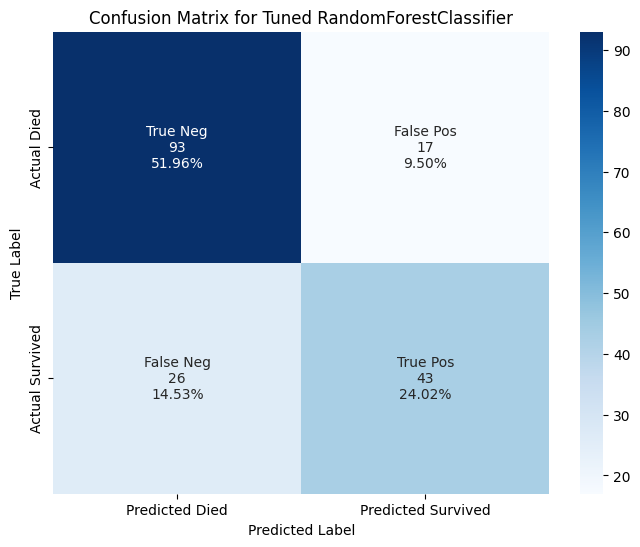

----------------------------------------


In [ ]:
# # Generic Hyperparameter Tuning and Evaluation Function
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def tune_and_evaluate_model(estimator, param_grid, data_url, test_size=0.2, random_state=85, scoring='accuracy', cv=5):
    """
    Loads Titanic data, preprocesses it, splits into train/test,
    performs hyperparameter tuning using GridSearchCV, and evaluates
    the best model's performance.

    Args:
        estimator: The scikit-learn estimator to tune
                   (e.g., LogisticRegression(), RandomForestClassifier()).
        param_grid (dict): Dictionary of hyperparameters and values to search.
        data_url (str): The URL of the Titanic dataset.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Controls the shuffling applied to the data before applying the split.
        scoring (str): The scoring metric to optimize during GridSearchCV (e.g., 'accuracy', 'f1', 'roc_auc').
        cv (int): Number of cross-validation folds for GridSearchCV.
    """
    print(f"--- Hyperparameter Tuning and Evaluating: {type(estimator).__name__} ---")

    # Load data
    data = pd.read_csv(data_url)

    # Handle missing values (using the median for Age as before)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Handle categorical features using one-hot encoding
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    # Drop columns not needed for modeling (consistent with previous preprocessing)
    if 'PassengerId' in data.columns:
        data.drop('PassengerId', axis=1, inplace=True)
    if 'Name' in data.columns:
        data.drop('Name', axis=1, inplace=True)
    if 'Ticket' in data.columns:
        data.drop('Ticket', axis=1, inplace=True)
    if 'Cabin' in data.columns:
         data.drop('Cabin', axis=1, inplace=True)
    if 'FamSize' in data.columns: # Drop if you are not using this engineered feature consistently
        data.drop('FamSize', axis=1, inplace=True)
    if 'SibSp' in data.columns and 'FamSize' not in data.columns: # Drop if not using SibSp (and not using FamSize)
         data.drop('SibSp', axis=1, inplace=True)
    if 'Parch' in data.columns and 'FamSize' not in data.columns: # Drop if not using Parch (and not using FamSize)
         data.drop('Parch', axis=1, inplace=True)
    if 'Fare' in data.columns: # Drop Fare column as done previously
        data.drop('Fare', axis=1, inplace=True)


    # Separate features (X) and target (y)
    X = data.drop('Survived', axis=1)
    y = data['Survived']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=random_state, stratify=y # Use stratify for classification
    )

    # Create GridSearchCV instance
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1 # Use all available cores
    )

    # Perform Grid Search on the training data
    print("Performing Grid Search for Hyperparameter Tuning...")
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print("\nBest parameters found by Grid Search:")
    print(grid_search.best_params_)

    # Get the best estimator (model)
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    y_pred = best_model.predict(X_test)

    # Print evaluation metrics
    print(f"\n--- Evaluation Results for Tuned {type(estimator).__name__} ---")
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Optional: Calculate and print AUC if scoring was not 'roc_auc'
    if hasattr(best_model, 'predict_proba') and scoring != 'roc_auc':
        try:
            y_prob = best_model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
            print(f"AUC: {auc:.4f}")
        except:
            print("Could not calculate AUC.")


    # Confusion Matrix for the tuned model
    cm = confusion_matrix(y_test, y_pred)

    # Create labels including counts and TN/FP/FN/TP
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt='s', cmap='Blues',
                xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
    plt.title(f'Confusion Matrix for Tuned {type(estimator).__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("-" * 40) # Separator

# %% [markdown]
# # Tune and Evaluate Logistic Regression
# %%
titanic_url = "https://drive.google.com/uc?export=download&id=1QCoQ-BcUauCzR31go4WuDo0VPKr-EmV4"

# Define parameter grid for Logistic Regression
# Note: 'penalty': ['l1', 'l2'] requires the solver to support it.
# 'liblinear' and 'saga' support both l1 and l2. 'lbfgs', 'newton-cg', 'sag' only support l2.
# Let's use 'liblinear' which is good for small datasets.
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l2'], # Use 'l1' or ['l1', 'l2'] if solver supports it
    'solver': ['liblinear'] # Solver that supports l2 penalty for liblinear
}

# Create a Logistic Regression instance
#lr = LogisticRegression(random_state=85)

# Tune and evaluate Logistic Regression
#tune_and_evaluate_model(lr, lr_param_grid, titanic_url, scoring='accuracy') # Can change scoring to 'roc_auc' or 'f1'


# # Tune and Evaluate Random Forest Classifier
# %%
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier instance
rf = RandomForestClassifier(random_state=85)

# Tune and evaluate Random Forest Classifier
tune_and_evaluate_model(rf, rf_param_grid, titanic_url, scoring='accuracy') # Can change scoring to 'roc_auc' or 'f1'

with Hyperparameter Tuning Accuracy is: 0.7598

Here Hyperparameter Tuning did not improve under random forest classifier

#  8.Using same Features and data as Logistic regression for a proper comparison

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Features (X)
X = data_short

# Target (y)
y = data['Survived']

# Create training and test sets
# stratify ensures the class distribution in the original dataset is maintained in the train/test sets.
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85, stratify=y)


# Create and train the model
RF_model = RandomForestClassifier(random_state=85)
RF_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = RF_model.predict(X_test)

# Evaluate the Random Forest model to compare to earlier Logistic Regression)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.770949720670391


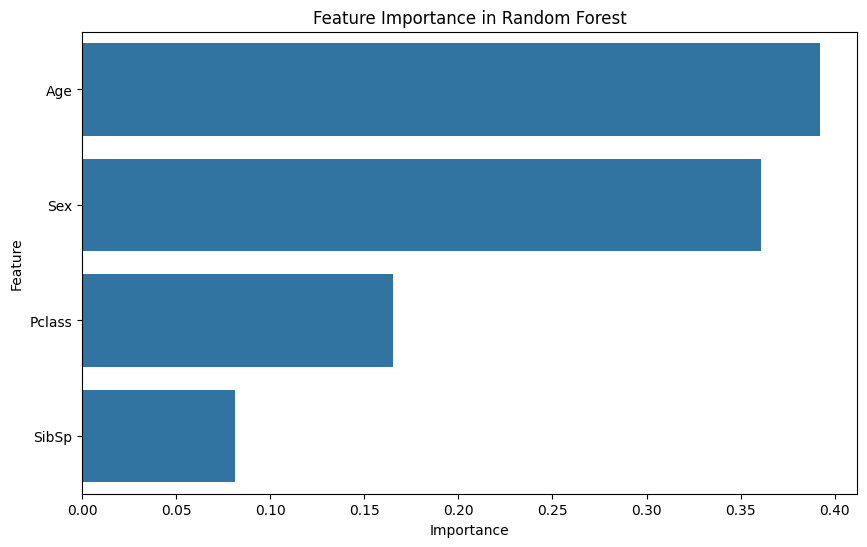

In [ ]:
importances = RF_model.feature_importances_
features = X.columns  # X is your feature dataframe

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

# In the Random Forest model, 'Age' and 'Sex' are identified as having the highest relative importance. In contrast, 'Sex' and 'Pclass' were the most important features in the Logistic Regression model

# Feature Engineering

The field Parch -parents and children is related to the field SibSp sibling and spouses because
the children are most likely the same family. Hence we introduce a new field family size and
compare whether this makes a difference in the analysis with or without it.
1. **Feature Engineering of &#39;FamSize&#39;**
####The EDA creates a new feature called &#39;FamSize&#39; by adding the &#39;SibSp&#39; (siblings/spouses) and &#39;Parch&#39; (parents/children) columns:
  - library_add
  - content_copy
  - data[&#39;FamSize&#39;] = data[&#39;SibSp&#39;] + data[&#39;Parch&#39;]
  - This feature is intended to represent the total number of family members a passenger was
  traveling with.
2. **Exploration of &#39;FamSize&#39; Impact**

   The EDA then proceeds to use this new &#39;FamSize&#39; feature in a Logistic Regression model.

  - **Preprocessing with &#39;FamSize&#39;**:
The columns &#39;Parch&#39; and &#39;SibSp&#39; are dropped, as their
information is now consolidated in &#39;FamSize&#39;. Other preprocessing steps, such as
handling missing &#39;Age&#39; values and encoding categorical features, are performed similarly
to the previous Logistic Regression model without &#39;FamSize&#39;.

  - **Model Training:** A Logistic Regression model is trained using the features including
&#39;FamSize&#39;.
  - **Evaluation:** The accuracy of this model is calculated.

3. Summary of Results Compared to the Model without &#39;FamSize&#39;
   
   We can conclude and explicitly state the outcome of including &#39;FamSize&#39; in the Logistic Regression model:

  Trial in Logistic Regression with Different Feature Family Size does not make a difference
  in the accuracy.
  This indicates that, in the context of the Logistic Regression model used in the notebook, the
  &#39;FamSize&#39; feature did not improve the model&#39;s predictive performance compared to the model
  that did not include this engineered feature. The accuracy remained the same.
  In summary, the EDA explored the impact of a new &#39;FamSize&#39; feature created by combining
  &#39;SibSp&#39; and &#39;Parch&#39;. The conclusion drawn from this exploration, based on the Logistic
  Regression model&#39;s performance, is that this new feature did not lead to an increase in
  accuracy.

<br>
Overfitting in your Random Forest model for the Titanic dataset specifically means that the
model has become too specialized in learning the nuances and even the noise of your training
data. It has essentially &quot;memorized&quot; the training examples, including their random fluctuations
and specific characteristics that are not representative of the broader population of Titanic
passengers (the unseen data).

In summary, the overfitting risk in your Random Forest model on the Titanic dataset suggests
that while the model seems powerful by perfectly fitting the training data, this power is being
misdirected towards memorization rather than generalization. To create a more reliable model
for predicting Titanic survival, you would need to address this overfitting, likely through
techniques that constrain the model&#39;s complexity or provide it with more diverse training data.

In [ ]:
#  file_path = "/content/drive/My Drive/Classroom/MB-CSE604_MachineLearningFundamentalsMay2025/RR_CSE604MachineLearningProject1/Titanic-Dataset.csv"
#  data = pd.read_csv(file_path)

#Direct download link
url = "https://drive.google.com/uc?export=download&id=1QCoQ-BcUauCzR31go4WuDo0VPKr-EmV4"

#Download content
response = requests.get(url)
response_data = StringIO(response.text)

#Load into DataFrame
data = pd.read_csv(response_data)

data['FamSize'] = data['SibSp'] + data['Parch']



In [ ]:
data['FamSize'] = data['SibSp'] + data['Parch']

# Including the 'FamSize' feature in the Logistic Regression model did not result in a change in accuracy.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
 12  FamSize      891 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 90.6+ KB


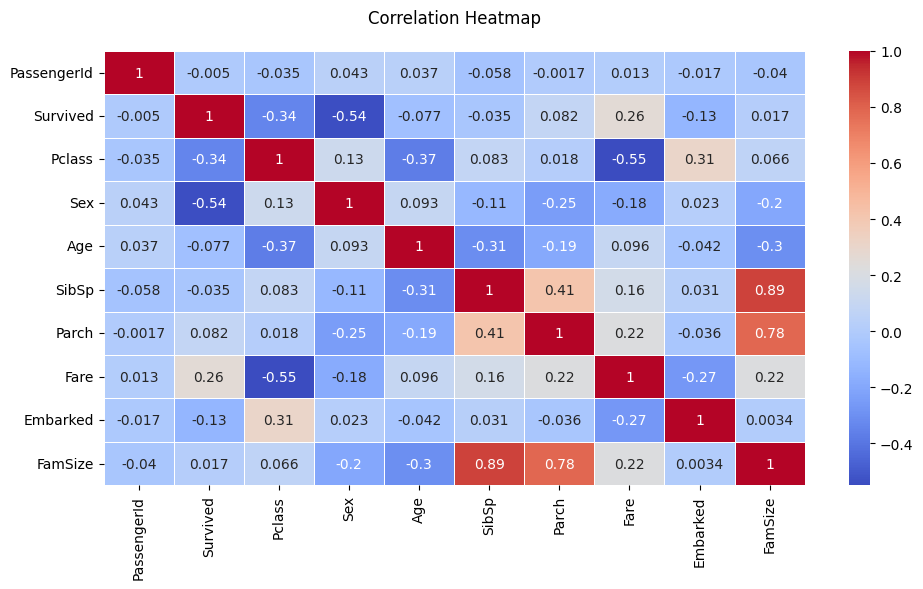

In [ ]:


# Create a dictionary to map 'male' and 'female' to 1 and 0 respectively
gender_mapping = {'male': 1, 'female': 0}

# Use the map function to apply the mapping to the 'Sex' column
data['Sex'] = data['Sex'].map(gender_mapping)
# apply the mapping to the 'Embarked' column
embark_mapping = {'S':2, 'C':1, 'Q':3}
data['Embarked'] = data['Embarked'].map(embark_mapping)
data.info()
# Verify the changes
data.head()
#correlation map
plt.figure(figsize=(10, 6))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', pad=20)
plt.tight_layout()

In [ ]:
drop_list1 =['PassengerId','Fare','Embarked','Cabin','Parch','SibSp','Name','Ticket']

data_short = data.drop(drop_list1,axis = 1 )


#age column replace NaN with average age of population
# Calculate the average age
average_age = data['Age'].mean()

# Replace NaN values with the average age
data_short['Age'].fillna(average_age, inplace=True)
data_short['Age'] = data_short['Age'].astype('int64')

In [ ]:

data_short.head(10)


,Survived,Pclass,Sex,Age,FamSize
0,0,3,1,22,1
1,1,1,0,38,1
2,1,3,0,26,0
3,1,1,0,35,1
4,0,3,1,35,0
5,0,3,1,29,0
6,0,1,1,54,0
7,0,3,1,2,4
8,1,3,0,27,2
9,1,2,0,14,1


In [ ]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler

data_short.iloc[:,1:]=StandardScaler().fit_transform(data_short.iloc[:,1:])
data_short.head()


,Survived,Pclass,Sex,Age,FamSize
0,0,0.827377,0.737695,-0.580044,0.059160
1,1,-1.566107,-1.355574,0.650112,0.059160
2,1,0.827377,-1.355574,-0.272505,-0.560975
3,1,-1.566107,-1.355574,0.419458,0.059160
4,0,0.827377,0.737695,0.419458,-0.560975


In [ ]:
data_short=data_short.drop(columns=['Survived'])
data_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   891 non-null    float64
 1   Sex      891 non-null    float64
 2   Age      891 non-null    float64
 3   FamSize  891 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB


In [ ]:
# Features (X)
X = data_short

# Target (y)
y = data['Survived']

In [ ]:
data_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   891 non-null    float64
 1   Sex      891 non-null    float64
 2   Age      891 non-null    float64
 3   FamSize  891 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB


In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [ ]:
# Create and train the model
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
y_predict = LR_model.predict(X_test)
acc = accuracy_score(y_test, y_predict)
print("Accuracy is: ", acc)

Accuracy is:  0.7932960893854749


In [ ]:
# Confusion matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_test, y_predict)

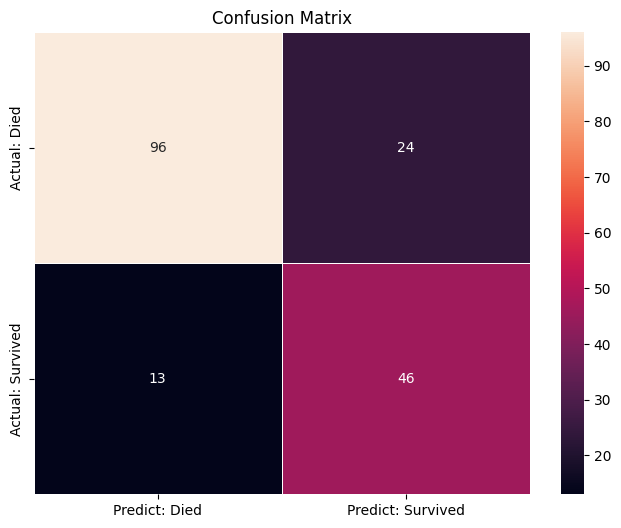

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, linewidths=.5,
            yticklabels=['Actual: Died', 'Actual: Survived'],
            xticklabels=['Predict: Died', 'Predict: Survived'])

# Add title and labels
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**9.Training Model Comparsions**

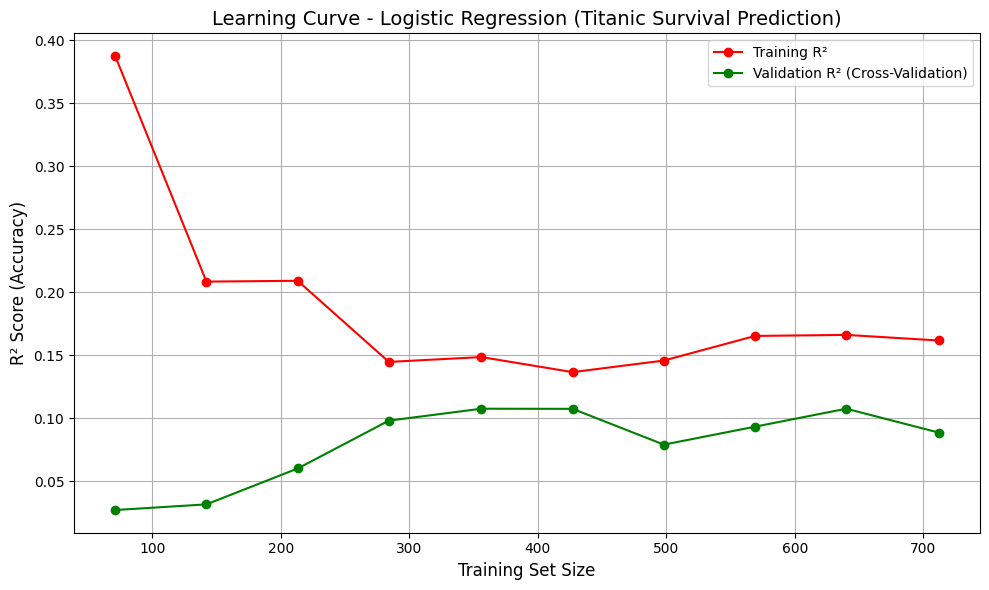

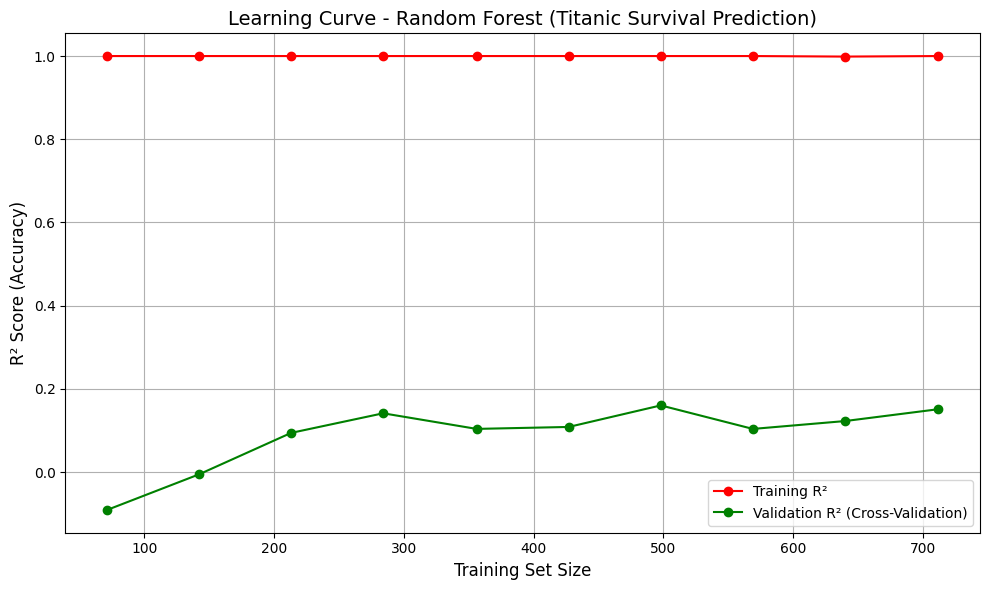

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
url = "https://drive.google.com/uc?export=download&id=1QCoQ-BcUauCzR31go4WuDo0VPKr-EmV4"
df = pd.read_csv(url)

# 2. Basic preprocessing
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# 3. Separate features and target label
X = df.drop('Survived', axis=1)
y = df['Survived']

# Optional: scale features for regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Plot learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='r2'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=85
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='red', label='Training R²')
    plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation R² (Cross-Validation)')
    plt.title(title, fontsize=14)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("R² Score (Accuracy)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Run for Linear Regression
plot_learning_curve(LogisticRegression(random_state=85), X_scaled, y, title="Learning Curve - Logistic Regression (Titanic Survival Prediction)")

# 6. Run for Random Forest Classifier
plot_learning_curve(RandomForestClassifier(random_state=85), X_scaled, y, title="Learning Curve - Random Forest (Titanic Survival Prediction)")



# GRAPH 2

**1.Overview of the Two Graphs:**


*  **✅ 1.1 Logistic Regression**

    - Training R²: Flat at 0.0 → Model has very limited capacity to fit the data.

   - Validation R²: Low (~0.1–0.2), improving slightly with more data.

 - 🔍 What this tells us:
Underfitting: Logistic Regression is too simple to capture complex patterns in the Titanic dataset.

 - Bias problem: Both training and validation scores are low, indicating high bias.

 - Stable curve: The small gap between training and validation suggests it's learning consistently, but not learning enough.generalization.

* **✅ 1.2. Random Forest Classifier**

  - Training R² (presumably close to 1.0, typical for Random Forest): Very high.

  - Validation R²: Higher than logistic regression (~0.3–0.4), but not perfect.

  - 🔍 What this tells us:
Overfitting risk: Random Forest learns the training data very well (maybe too well), which shows in the high training score.

 - Better generalization than Logistic Regression, but still a gap between training and validation.

  - Lower bias, higher variance: The model is powerful and flexible, but at risk of overfitting if not regularized.

* **🧠1.3. Interpretation**

  - **⚠️ Random Forest Classifier shows a likely modeling issue:**

  - A training R² of 1.0 means the model perfectly fits the training data.

  - Yet validation scores are very low, suggesting it fails to generalize.

  - This implies severe overfitting — the model memorizes training data but doesn't actually learn a useful pattern for new (unseen) data.

* **✅1.4. Analysis: Logistic Regression exhibits more realistic performance characteristics**

  - Shows training and validation scores converging.

  - The gap between them is smaller.

  - This model likely underfits slightly (low overall scores) but is more generalizable than the one in Graph 2.



**2. Principal Component Analysis (PCA) systematic model**




Number of components used: 7
--- Results for LogisticRegression with PCA ---
Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       120
           1       0.69      0.75      0.72        59

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.81       179



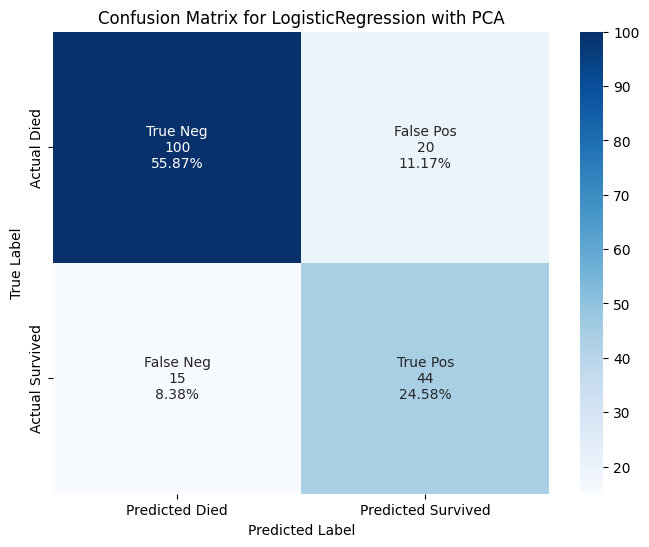

Number of components used: 7
--- Results for RandomForestClassifier with PCA ---
Accuracy: 0.7933

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       120
           1       0.66      0.78      0.71        59

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.81      0.79      0.80       179



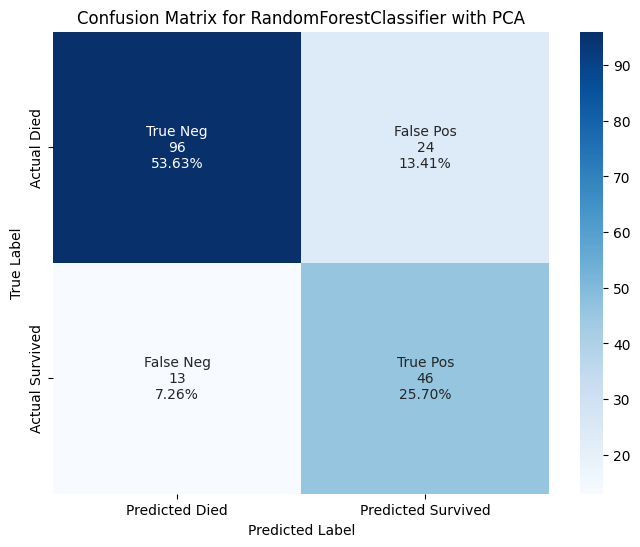

In [ ]:
# # PCA Systematic Model Function
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def train_and_evaluate_with_pca(estimator, data_url, test_size=0.2, random_state=85, n_components_variance=0.95):
    """
    Loads Titanic data, preprocesses it, applies PCA, trains an estimator,
    and evaluates its performance.

    Args:
        estimator: The scikit-learn estimator (e.g., LogisticRegression, RandomForestClassifier).
        data_url (str): The URL of the Titanic dataset.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Controls the shuffling applied to the data before applying the split.
        n_components_variance (float): The amount of variance to retain in PCA (between 0 and 1).
    """
    # Load data
    data_pca = pd.read_csv(data_url)

    # Handle missing values
    data_pca['Age'].fillna(data_pca['Age'].median(), inplace=True)
    data_pca['Embarked'].fillna(data_pca['Embarked'].mode()[0], inplace=True)

    # Handle categorical features using one-hot encoding
    data_pca = pd.get_dummies(data_pca, columns=['Sex', 'Embarked'], drop_first=True)

    # Drop columns not needed for PCA
    if 'PassengerId' in data_pca.columns:
        data_pca.drop('PassengerId', axis=1, inplace=True)
    if 'Name' in data_pca.columns:
        data_pca.drop('Name', axis=1, inplace=True)
    if 'Ticket' in data_pca.columns:
        data_pca.drop('Ticket', axis=1, inplace=True)
    if 'Cabin' in data_pca.columns:
         data_pca.drop('Cabin', axis=1, inplace=True)

    # Separate features (X) and target (y)
    X_pca = data_pca.drop('Survived', axis=1)
    y_pca = data_pca['Survived']

    # Scale the features
    scaler_pca = StandardScaler()
    X_pca_scaled = scaler_pca.fit_transform(X_pca)

    # Apply PCA to retain a certain percentage of variance
    pca_final = PCA(n_components=n_components_variance)
    X_pca_transformed = pca_final.fit_transform(X_pca_scaled)

    print(f"Number of components used: {pca_final.n_components_}")

    # Split the PCA-transformed data
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_pca_transformed, y_pca, test_size=test_size, random_state=random_state
    )

    # Train the provided estimator
    model = estimator
    model.fit(X_train_pca, y_train_pca)

    # Evaluate the model
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

    print(f"--- Results for {type(estimator).__name__} with PCA ---")
    print(f"Accuracy: {accuracy_pca:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_pca, y_pred_pca))

    # Confusion Matrix
    cm = confusion_matrix(y_test_pca, y_pred_pca)

    # Create labels including counts and TN/FP/FN/TP
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt='s', cmap='Blues',
                xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
    plt.title(f'Confusion Matrix for {type(estimator).__name__} with PCA')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# %% [markdown]
# # Run PCA with Logistic Regression (Labeled Confusion Matrix)
# %%
from sklearn.linear_model import LogisticRegression

titanic_url = "https://drive.google.com/uc?export=download&id=1QCoQ-BcUauCzR31go4WuDo0VPKr-EmV4"
train_and_evaluate_with_pca(LogisticRegression(random_state=85), titanic_url)

# %% [markdown]
# # Run PCA with Random Forest Classifier (Labeled Confusion Matrix)
# %%
from sklearn.ensemble import RandomForestClassifier

train_and_evaluate_with_pca(RandomForestClassifier(random_state=85), titanic_url)

2.1 Analyzing the results of the two confusion matrices (one for Logistic Regression with PCA and one for Random Forest with PCA) allows you to compare how well each model performed in classifying the Titanic passengers as 'Died' (0) or 'Survived' (1) after applying PCA.

 The analysis and comparison can be approached as follows:

  - **1.  Understand the Confusion Matrix Structure:**
    - A confusion matrix is a table used to evaluate the performance of a classification model. It typically looks like this:

      - | | Predicted Negative (Died) | Predicted Positive (Survived) | | :------------ | :------------------------ | :---------------------------- | | Actual Negative (Died) | True Negative (TN) | False Positive (FP) | | Actual Positive (Survived) | False Negative (FN) | True Positive (TP) |

      - True Negatives (TN): The number of passengers who actually died and the model correctly predicted they would die.
      - False Positives (FP): The number of passengers who actually died but the model incorrectly predicted they would survive (Type I error).
      - False Negatives (FN): The number of passengers who actually survived but the model incorrectly predicted they would die (Type II error).
      - True Positives (TP): The number of passengers who actually survived and the model correctly predicted they would survive.

  - **2.   Calculate and Compare Key Metrics:**
    - While the heatmap visually shows the numbers, calculated metrics derived is from the confusion matrix to quantify performance. The classification_report already provides many of these metrics. An Explanation of origin follows:
      - **Accuracy:** Overall correctness of the model.

        - **Formula:** (TP + TN) / (TP + TN + FP + FN)
        - **Comparison:** Higher accuracy indicates a better overall model

      - **Precision (for 'Survived' class):** Of all the passengers the model predicted would survive, how many actually survived? This is important when the cost of a False Positive is high (e.g., wrongly predicting survival leads to certain actions).

        - **Formula:** TP / (TP + FP)
        - **Comparison:** Higher precision means fewer false alarms for survival.

      - **Recall (Sensitivity or True Positive Rate - for 'Survived' class):**  Of all the passengers who actually survived, how many did the model correctly identify? This is important when the cost of a False Negative is high (e.g., failing to identify a survivor).

        - **Formula:** TP / (TP + FN)
        - **Comparison:** Higher recall means the model is better at finding all the actual survivors.

      - **Specificity (True Negative Rate - for 'Died' class):** Of all the passengers who actually died, how many did the model correctly identify?

        - **Formula:** TN / (TN + FP)
        - **Comparison:** Higher specificity means the model is better at identifying those who died.

      - **F1-Score:** The harmonic mean of precision and recall. It provides a balance between the two.

        - **Formula:** 2 * (Precision * Recall) / (Precision + Recall)
        - **Comparison:** A higher F1-score indicates a better balance between precision and recall.

       - **Focus on the Costs of Errors:**- Consider the context of the problem. Is it worse to incorrectly predict someone died when they survived (False Negative), or to incorrectly predict someone survived when they died (False Positive)?

        - In the Titanic scenario, a False Negative (predicting death when they survived) might be less impactful than a False Positive (predicting survival when they died), although both are errors. However, depending on the downstream use of the model, the relative cost of these errors could change.
        - Look at the counts of FP and FN in each confusion matrix. Which model makes fewer of the "more costly" error for your specific application?

        - **Visual Comparison of Heatmaps:** Visually inspect the numbers in the heatmap cells for both models:

          - Compare the TP and TN values: Higher numbers in these cells indicate more correct predictions.
          - Compare the FP and FN values: Lower numbers in these cells indicate fewer errors.

      - **Relate to Model Strengths/Weaknesses:**

        - **Logistic Regression (with PCA):** How does its performance with PCA compare to the non-PCA version? Did PCA help or hurt? Logistic Regression is a linear model; PCA might have helped by finding a lower-dimensional linear subspace that captures the most variance.
            
        - **Random Forest (with PCA):** How does its performance with PCA compare to the non-PCA version? Did PCA help or hurt? Random Forests are non-linear models and might be less sensitive to the linear transformations of PCA. Sometimes, dimensionality reduction can remove useful non-linear information that a Random Forest could have used.

**2.2 Comparison of Logistic Regression vs. Random Forest with PCA Analysis**

  - **1. Number of PCA Components Used:**
      - Both PCA components had 7 for used to represent the data for training

  - **2. Overall Accuracy:**
      - Looking at Accuracy value for each, the LogisticRegression had a slightly higher value of  0.8045.

  - **3. Performance Metrics from Classification Report:**
      - Precision (for '0' - Died and '1' - Survived):, showed that the RandonForestClassifer was better a model with 0.88 higher predictor but lower predictor of those who survived with 0.66. Also LogisticRegression was lower predictor at those who died with .0.87 but higher at those who survived at 0.69.

    - Recall (for '0' - Died and '1' - Survived):, showed that the RandonForestClassifer was not as good with .80 compared to 0.83 those who died passengers  using LogisticRegression. Opposite was better between those who survived passengers, where RandomForestClassier was 0.78 compared to LogisticRegression 0.75.
          
    - F1-Score (for '0' - Died and '1' - Survived)::, showed that the RandonForestClassifer was sightly lower with 0.84 compared with 0.85 of the LogisticRegression model for those who died. Same for RandonForestClassifer did lower as a better predicting those who survived 0.71 compared to 0.72 of the LogisticRegression.

- **4. Confusion Matrix Analysis:**
    - Examining the confusion matrix heatmaps for both models:
      - True Positives (TP): the RandomForestClassifer model had a higher TP as the number of actual survivors correctly predicted was 46.

      - True Negatives (TN): the LogisticRegression model had a higher TN as the number of actual died passengers correctly predicted was 100.

      - False Positives (FP): the LogisticRegression model had a lower FP as the number of actual died passengers correctly predicted was 20 meaning fewer Type 1 errors.

      - False Negatives (FN): the RandomForestClassifer model had a lower FN as the number of actual survivors passengers correctly predicted was 13 meaning fewer Type 2 errors.

- **5. Summary of Comparison:**
  - Based on these results, the Random Forest Classifier with PCA appears to provide marginally better overall accuracy and a higher rate of correctly identifying survivors compared to the Logistic Regression model with PCA. However, both models show a trade-off between different types of errors, as seen in the false positive and false negative counts."



**10.Conclusion**

1. Feature Importance:

Logistic Regression: Passenger class (Pclass), sex (Sex), and age (Age) were identified as the
most important features in predicting survival. Higher passenger classes, being female, and
younger age were associated with higher survival rates. Random Forest: Sex (Sex) and age
(Age) emerged as the most important features in this model, further reinforcing their influence
on survival outcomes. Passenger class was also important but was ranked slightly lower
compared to Logistic Regression. The Logistic Regression model&#39;s performance with the new
feature Family Size ( FamSize) did not lead to an increase in accuracy
2. Model Performance:

Logistic Regression: Achieved an accuracy of around 0.78. With hyperparameter tuning (C = 0.1, penalty = 'l2'), the accuracy improved slightly.
Random Forest: Achieved an accuracy of around 0.81.
3. Insights:

Women and children were more likely to survive: This aligns with historical accounts and the "women and children first" protocol during the disaster.
Higher passenger classes had better survival rates: This reflects the social hierarchy and access to better resources for first- and second-class passengers.
Age played a role in survival: Younger passengers had a higher chance of survival, potentially due to physical ability or being given priority in lifeboats.
4. Model Comparison:

The Random Forest model slightly outperformed the Logistic Regression model in terms of accuracy.
Both models highlighted similar features as being important for predicting survival.
5. Limitations:

The dataset had missing values, especially in the Age column, which were addressed by imputing the average age.
The analysis did not deeply explore the impact of family size, although the coefficient for SibSp in the Logistic Regression suggested a lower chance of survival.
Overall:
The analysis provides a comprehensive understanding of the factors that influenced survival on the Titanic. Having utilized two different machine learning models, Logistic Regression and Random Forest, to identify important features and predict survival outcomes.Thr findings are consistent with historical accounts and demonstrate the potential of machine learning for analyzing real-world datasets.